# Data Visualization

The effort to understand data by placing it in a visual context

# Dr. Edward Tufte

- Though leader and practicioner of data visualization
- Written two excellent books on the subject:
    - The Visual Display of Quantitative Information
    - Envisioning Information
- Put down some principles for data visualization

# Excellence in Visualization

- Clear, precise, and efficient communication of complex ideas
- Greatest number of ideas in the smallest amount of time and space
- Multivariate
- Conveys the truth

# Visualization Goals
- Content focus
- Comparison rather than description
- Integrity
- High resolution
- Utilize designs proven with time

# The Message

- Can use tables, charts, animations, inforgraphics ..etc
- Powerful if the right data and graphic are [combined](https://www.youtube.com/watch?v=5Zg-C8AAIGg)
- We will focus mostly on charts and tables, but know that **the possibilities are bigger**.
- To improve your visualization, read the work of **Stephen Few**:
    - Show Me the Numbers: Designing Tables and Graphs to Enlighten
    - Information Dashboard Design: Displaying Data for At-a-Glance Monitoring

# The Visualization Tools - In Python
- Matplotlib
- Bokeh 
- ggplot
- Seaborn
- Plotly
- [Altair](https://altair-viz.github.io/installation.html) (We will use this)
- .. others

They vary in their simplicity and capabilities: static, interactive, animated ..etc.

# Other Visualization Platforms
- R: ggplot2, ggvis, .. libraries much like python
- [Tableau](https://www.tableau.com/): The current defacto standard in data visualization for non-programmers
- SAS, SPSS, Excel, Matlab, Stata ... etc.


# The Message: Charts Vs. Tables

- Tables used to accuratly show the values of specific data points
    - Dataframes, frequency tables, balance sheets ...etc
- Charts used to display patterns and comparisons
    - Histograms, box plots, scatter plots, bar plots ..etc



![](https://www.timeshighereducation.com/Pictures/web/s/q/r/dec-news-table-01-smal_450.jpg)

**Source:** Timer Higher Education

![chart](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/U.S._Phillips_Curve_2000_to_2013.png/800px-U.S._Phillips_Curve_2000_to_2013.png)

# Message Types
- Time series: How values change with time
- Rankings: Categorical subdivisions ordered in ascending or descending order for comparison
- Part-to-whole: Categorical subdivisions to show ratio to the whole
- Deviation: Categorical subdivisions compared to reference (like mean or predicted values)

# Message Types Cont.
- Frequency distributions
- Correlations: Comparison between two variables
- Nominal comparisons: Comparison of categorecal subdivisions without a particular order
- Geospatial: Comparison of data across map or layout 

# The Right Chart for The Message

- See the [chart selection matrix by Stephen Few](http://www.perceptualedge.com/articles/misc/Graph_Selection_Matrix.pdf)
    - View also his [presentation](https://nces.ed.gov/programs/slds/pdf/08_F_06.pdf) on improving charts
- See also [selecting the right chart type by Andrew Abela](https://i1.wp.com/www.tatvic.com/blog/wp-content/uploads/2016/12/Pic_2.png)

# References and Resources

- Tufte, E. R. (2001). The visual display of quantitative information.
    - [Chapter 1](https://www.colorado.edu/geography/foote/maps/assign/reading/TufteCoversheet.pdf)

- [The Encyclopedia of Human-Computer Interaction](https://www.interaction-design.org/literature/book/the-encyclopedia-of-human-computer-interaction-2nd-ed/data-visualization-for-human-perception)

- [Resources for 424 Info Vis. Course at University of Washington](http://courses.washington.edu/info424/2007/DataSources.htm) By. Prof. Maureen Stone and Prof. Polle Zellweger.
- [Tableau public, try it for free](https://public.tableau.com/s/)


# Visualization in Python

Install [Altair](https://altair-viz.github.io/installation.html)

in cmd or terminal, type the following:
```bash
conda install altair --channel conda-forge
```

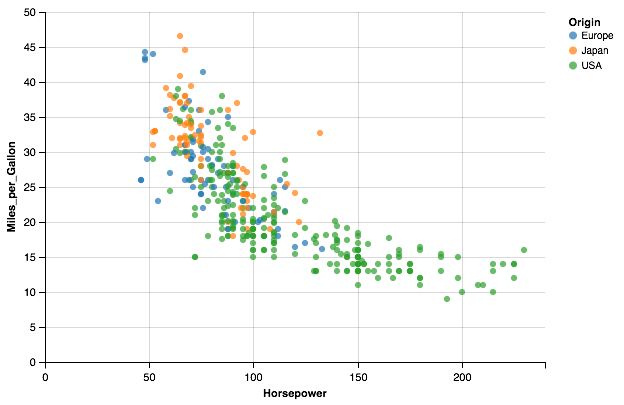

In [50]:
# using altair
import pandas as pd
import altair as alt

# you need a dataset
cars_df = pd.read_json("https://github.com/vega/vega-datasets/raw/gh-pages/data/cars.json")

# you can also load the sample data provided with altair using
# cars_df = alt.load_dataset('cars')
# for list of data sets, run the following command in jupyter:
# alt.datasets.list_datasets()

# Build the chart and configure it
chart = alt.Chart(cars_df).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

# display it
chart

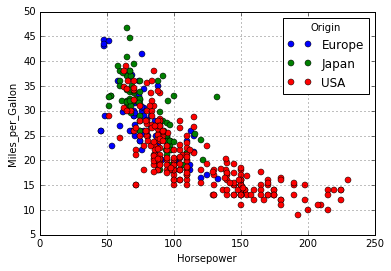

In [5]:
# Same chart on matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# use loop to plot each circle in a different color
for (origin), group in cars_df.groupby('Origin'):
    plt.plot(group['Horsepower'], group['Miles_per_Gallon'],
             'o', label=origin)

# set the legend and labels
plt.legend(title='Origin')
plt.xlabel('Horsepower')
plt.ylabel('Miles_per_Gallon');

# enable grid
plt.grid(True)

# Altair uses a declarative syntax
- You express the logic of constructing the plot
- Matplotlib uses imperitave syntax where you give specific instructions to construct the plot
- Assumes that the data is in tidy form
    - Required reading: [Tidy Data, by Hadley Wickham](http://vita.had.co.nz/papers/tidy-data.pdf)


# The Syntax

```Python
Chart( data ).mark_type( options ).encode( channels )
   1     2        3         4        5        6

# alternatively you can reverse mark and encode
Chart( data ).encode( channels ).mark_type( options )
```

```Python
Chart( data ).mark_type( options ).encode( channels )
   1     2        3         4        5        6
```
### 1- Chart:

Construct a chart object (OOP), can be:
- Chart: Used to display a single chart, our likely use case
- LayeredChart: To place multiple charts on top of one another (When you want to be fancy)



```Python
Chart( data ).mark_type( options ).encode( channels )
   1     2        3         4        5        6
```
### 2- Data:

Tells Altair what data set to use for the plot, can be:
- Pandas dataframe
- Altair Data object
- URL/filename of json or csv data
    - **Remember:** json must be list of dictionaries (called objects in javascript)
    - Use this to keep the size of the notebook small



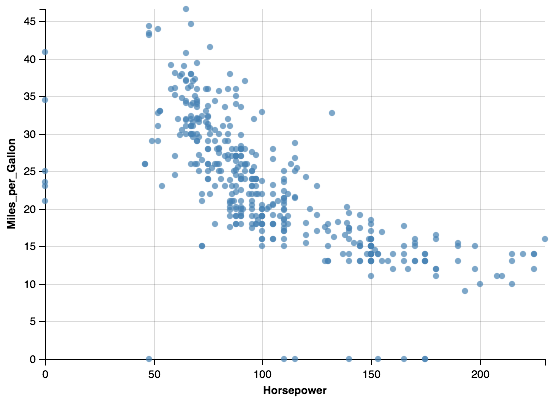

In [44]:
# url also works
url = 'https://vega.github.io/vega-datasets/data/cars.json'

alt.Chart(url).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    #color="Origin", # bug, does not work with url
)

```Python
Chart( data ).mark_type( options ).encode( channels )
   1     2        3         4        5        6
```
### 3- Marks:

Tells Altair how to represent values on the chart, includes:
- mark_line(), mark_area(), mark_round(), mark_bar()
- Can be configured with mark_options
- Unlike pandas, these will mutate the original chart
- Complete list available [here](https://altair-viz.github.io/documentation/marks.html)

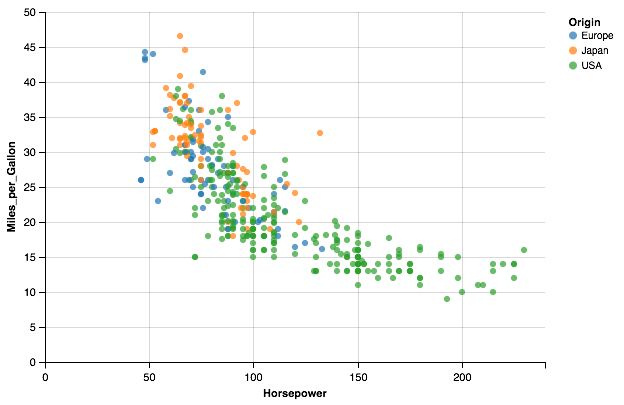

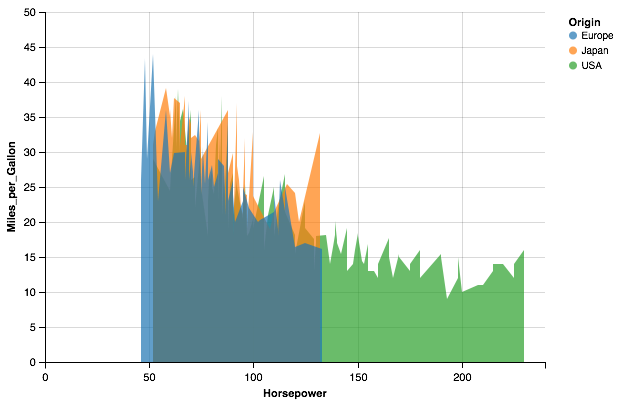

In [51]:
# we can use this command to display multiple charts from a single cell
chart.display()

# let's modify our chart
chart.mark_area() # this mutated chart

# try other mark_* types
chart.display() # this will show the mutated plot

```Python
Chart( data ).mark_type( options ).encode( channels )
   1     2        3         4        5        6
```
### 4- Mark options:

- Options to change the properties of **all** marks
- Options passed as arguments and can be found [here](https://altair-viz.github.io/API.html#altair.MarkConfig), e.g.:
```Python
alt.Chart(url).mark_circle(
    color='red',
    opacity=0.3
)
```

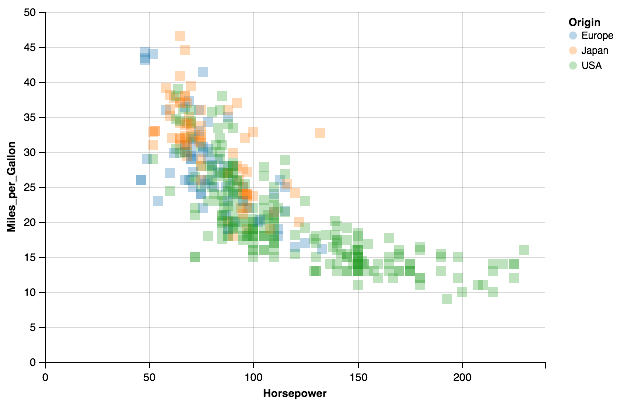

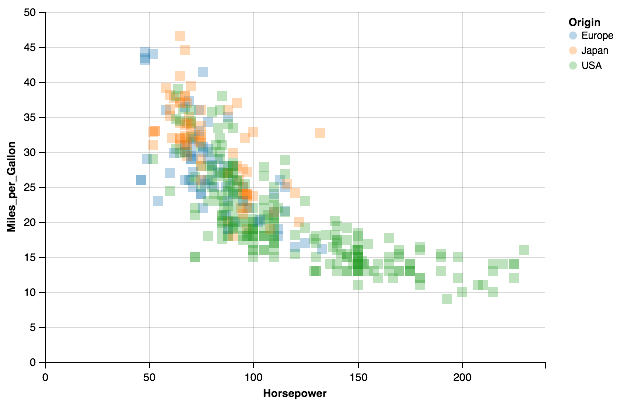

In [46]:
# These are options that affect all the points
chart.mark_square(opacity=0.3, size=100)



```Python
Chart( data ).mark_type( options ).encode( channels )
   1     2        3         4        5        6
```
### 5- Encode:
- Must be there, tells altair how to plot the values


```Python
Chart( data ).mark_type( options ).encode( channels )
   1     2        3         4        5        6
```
### 6- Encoding Channels
These are the options to tell altair how to:
- Link data to axis
- Plot the data
- Group/transform the data

These options are referred to as **Channels**

# Most important channel configurations:
- x: Name of column to map to x axis (as a string)
- y: Name of column to map to x axis (as a string)

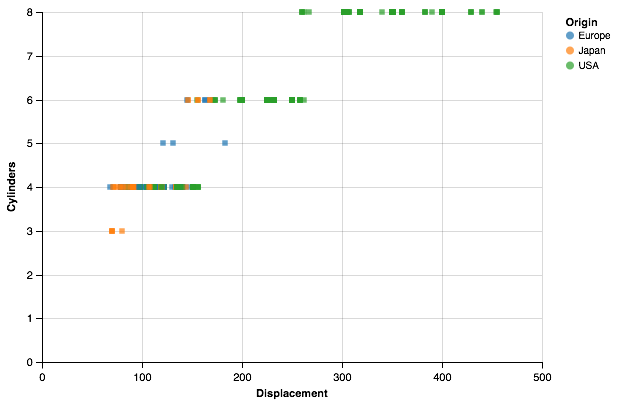

In [56]:
# plot Displacement vs Cylinders
chart.encode(x="Displacement", y="Cylinders")

# notice how previous options remain if not changed (like color)

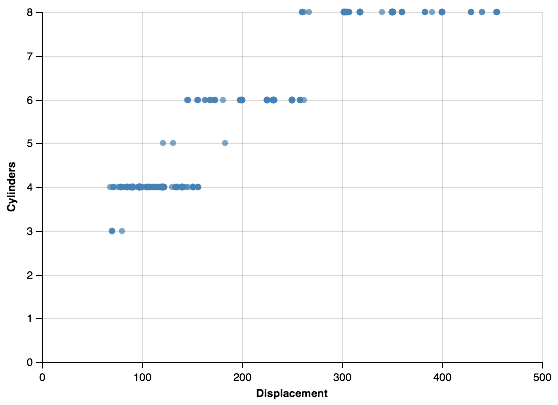

In [58]:
# it's better to create a new chart object for new charts 
# so that it is not affected by previous changes

alt.Chart(cars_df).mark_circle().encode(x="Displacement", y="Cylinders")

# Notice how values are no longer colored

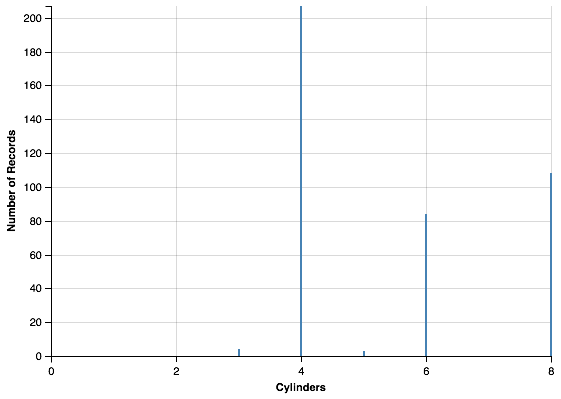

In [82]:
alt.Chart(cars_df).mark_bar().encode(
    x="Cylinders",
    y="count(*)",)

# Aggregation Function in Altair
You can use the following functions to describe the aggregation for the axes values in the following format:
`'aggregation(variable)'`

Use \* in place of variable to mean **for any row/observation**

The functions include: sum, mean, media, variance, stdev, distinct .. and [more](https://altair-viz.github.io/documentation/encoding.html#binning-and-aggregation)


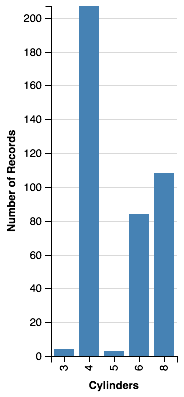

In [83]:
# 
alt.Chart(cars_df).mark_bar().encode(
    x="Cylinders:N",
    y="count(*)",)

# Column names can describe the datatype

- using : and a letter after the name to describe the type.
- For example: ```'sales:Q'``` tells Altair that the sales column is a quantitative value.
- Letter can be:

|Data Type|Letter|Description|
| :--- | :----: |:-------------: |
|quantitative|Q|a continuous real-valued quantity|
|ordinal|O|a discrete ordered quantity|
|nominal|N|a discrete unordered category|
|temporal|T|a time or date value|

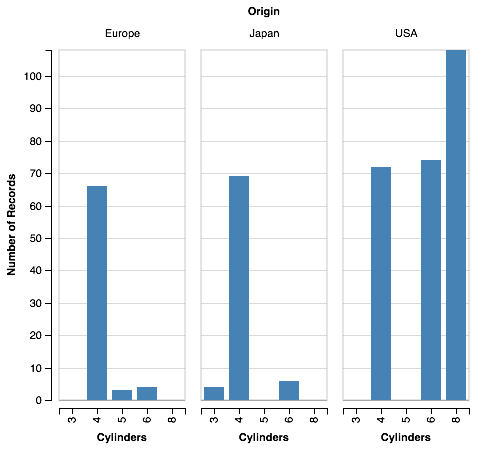

In [84]:
# you can use column or row to split the graphs based on group
# this is called a trellis plot

alt.Chart(cars_df).mark_bar().encode(
    column="Origin",
    x="Cylinders:N",
    y="count(*)",)

# Channels With Legends
- These are the channels that produce a legend on the graph.
- Used typically with a categorical grouping variable
- These channel configurations affect individual points on the plot based on its value
    - Remember, configuring a mark will affect all points on the plot
- The channels include: color, opacity, size, and shape

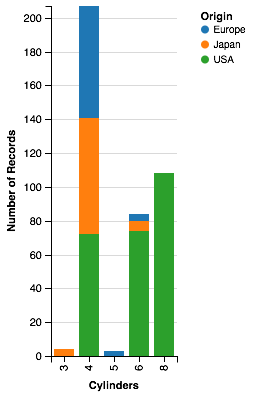

In [19]:
alt.Chart(cars_df).mark_bar().encode(
    color="Origin",
    x="Cylinders:N",
    y="count(*)",)

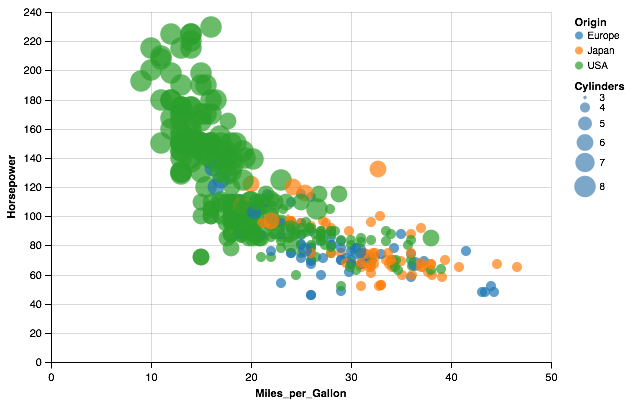

In [28]:
alt.Chart(cars_df).mark_circle().encode(
    color="Origin",
    size="Cylinders",
    x="Miles_per_Gallon",
    y="Horsepower",)

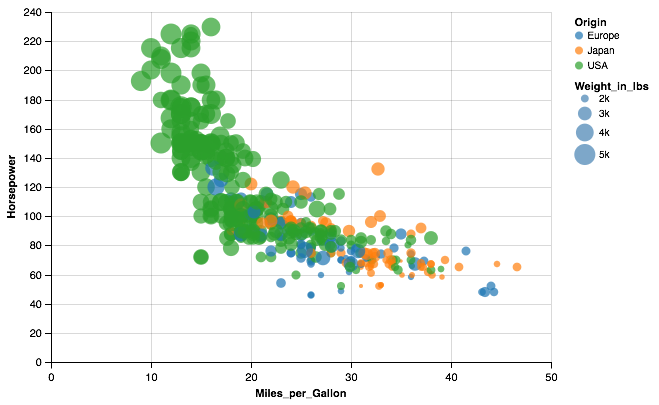

In [29]:
alt.Chart(cars_df).mark_circle().encode(
    color="Origin",
    size="Weight_in_lbs",
    x="Miles_per_Gallon",
    y="Horsepower",)

# Notes on Altair

- Data is included with plot, the more plots in the notebook, the greater its size in MB
- Maximum data points are 5000 to miaintain performance, can be increased to 10000 using `cart.max_rows = 10000`
- Use chart_display() to display multiple charts from a single cell
- Unlike jupyter, performing methods on chart object will mutate it